Custom Dimensional Weight Divisor : 257

The incentives stated above are valid from July 27, 2019 to June 29, 2024.

Instructions

https://billing.ups.com/home

    click on my invoices

    export data to table to create the helpful one

    download documents to create the detailed one


https://docs.google.com/document/d/1X_ptuq2UsNBSR3m1nW-qWsye34lB7soxKTAYMYcmDEM/edit?usp=sharing

https://www.ups.com/assets/resources/media/en_US/SurePost_Terms.pdf -- Surepost terms


In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 50)

In [2]:
header_list = ["Version","Recipient Number","Account Number","Account Country/Territory","Invoice Date","Invoice Number",
               "Invoice Type Code","Invoice Type Detail Code","Account Tax ID","Invoice Currency Code","Invoice Amount",
               "Transaction Date","Pickup Record Number","Lead Shipment Number","World Ease Number",
               "Shipment Reference Number 1","Shipment Reference Number 2","Bill Option Code","Package Quantity",
               "Oversize Quantity","Tracking Number","Package Reference Number 1","Package Reference Number 2",
               "Package Reference Number 3","Package Reference Number 4","Package Reference Number 5","Entered Weight",
               "Entered Weight Unit of Measure","Billed Weight","Billed Weight Unit of Measure","Container Type",
               "Billed Weight Type","Package Dimensions","Zone","Charge Category Code","Charge Category Detail Code",
               "Charge Source","Type Code 1","Type Detail Code 1","Type Detail Value 1","Type Code 2","Type Detail Code 2",
               "Type Detail Value 2","Charge Classification Code","Charge Description Code","Charge Description",
               "Charged Unit Quantity","Basis Currency Code","Basis Value","Tax Indicator","Transaction Currency Code",
               "Incentive Amount","Net Amount","Miscellaneous Currency Code","Miscellaneous Incentive Amount",
               "Miscellaneous Net Amount","Alternate Invoicing Currency Code","Alternate Invoice Amount",
               "Invoice Exchange Rate","Tax Variance Amount","Currency Variance Amount","Invoice Level Charge",
               "Invoice Due Date","Alternate Invoice Number","Store Number","Customer Reference Number","Sender Name",
               "Sender Company Name","Sender Address Line 1","Sender Address Line 2","Sender City","Sender State",
               "Sender Postal","Sender Country/Territory","Receiver Name","Receiver Company Name","Receiver Address Line 1",
               "Receiver Address Line 2","Receiver City","Receiver State","Receiver Postal","Receiver Country/Territory",
               "Third Party Name","Third Party Company Name","Third Party Address Line 1","Third Party Address Line 2",
               "Third Party City","Third Party State","Third Party Postal","Third party Country/Territory","Sold To Name",
               "Sold To Company Name","Sold To Address Line 1","Sold To Address Line 2","Sold To City","Sold To State",
               "Sold To Postal","Sold to Country/Territory","Miscellaneous Address Qual 1","Miscellaneous Address 1 Name",
               "Miscellaneous Address 1 Company Name","Miscellaneous Address 1 Address Line 1",
               "Miscellaneous Address 1 Address Line 2","Miscellaneous Address 1 City","Miscellaneous Address 1 State",
               "Miscellaneous Address 1 Postal","Miscellaneous address 1 Country/Territory","Miscellaneous Address Qual 2",
               "Miscellaneous Address 2 Name","Miscellaneous Address 2 Company Name","Miscellaneous Address 2 Address Line 1",
               "Miscellaneous Address 2 Address Line 2","Miscellaneous Address 2 City","Miscellaneous Address 2 State",
               "Miscellaneous Address 2 Postal","Miscellaneous address 2 Country/Territory","Shipment Date",
               "Shipment Export Date","Shipment Import Date","Entry Date","Direct Shipment Date","Shipment Delivery Date",
               "Shipment Release Date","Cycle Date","EFT Date","Validation Date","Entry Port","Entry Number","Export Place",
               "Shipment Value Amount","Shipment Description","Entered Currency Code","Customs Number","Exchange Rate",
               "Master Air Waybill Number","EPU","Entry Type","CPC Code","Line Item Number","Goods Description","Entered Value",
               "Duty Amount","Weight","Unit of Measure","Item Quantity","Item Quantity Unit of Measure","Import Tax ID",
               "Declaration Number","Carrier Name/Clinical Trial Identification Number/SDS ID ","CCCD Number","Cycle Number",
               "Foreign Trade Reference Number","Job Number","Transport Mode","Tax Type","Tariff Code","Tariff Rate",
               "Tariff Treatment Number","Contact Name","Class Number","Document Type","Office Number","Document Number",
               "Duty Value","Total Value for Duty","Excise Tax Amount","Excise Tax Rate","GST Amount","GST Rate",
               "Order In Council","Origin Country/Territory","SIMA Access","Tax Value","Total Customs Amount",
               "Miscellaneous Line 1","Miscellaneous Line 2","Miscellaneous Line 3","Miscellaneous Line 4",
               "Miscellaneous Line 5","Payor Role Code","Miscellaneous Line 7","Miscellaneous Line 8","Miscellaneous Line 9",
               "Miscellaneous Line 10","Miscellaneous Line 11","Duty Rate","VAT Basis Amount","VAT Amount","VAT Rate",
               "Other Basis Amount","Other Amount","Other Rate","Other Customs Number Indicator","Other Customs Number",
               "Customs Office Name","Package Dimension Unit Of Measure","Original Shipment Package Quantity","Corrected Zone",
               "Tax Law Article Number","Tax Law Article Basis Amount","Original tracking number","Scale weight quantity",
               "Scale Weight Unit of Measure","Raw dimension unit of measure","Raw dimension length","BOL # 1","BOL # 2",
               "BOL # 3","BOL # 4","BOL # 5","PO # 1","PO # 2","PO # 3","PO # 4","PO # 5","PO # 6","PO # 7","PO # 8",
               "PO # 9","PO # 10","NMFC","Detail Class","Freight Sequence Number","Declared Freight Class","EORI Number",
               "Detail Keyed Dim","Detail Keyed Unit of Measure","Detail Keyed Billed Dimension","Detail Keyed Billed Unit of Measure",
               "Original Service Description","Promo Discount Applied Indicator","Promo Discount Alias","SDS Match Level Cd",
               "SDS RDR Date","SDS Delivery Date","SDS Error Code","Place Holder 46","Place Holder 47","Place Holder 48",
               "SCC Scale Weight","Place Holder 50","Place Holder 51","Place Holder 52","Place Holder 53","Place Holder 54",
               "Place Holder 55","Place Holder 56","Place Holder 57","Place Holder 58","Place Holder 59"]

In [3]:
# All files 
extension = 'csv'
all_filenames = [i for i in glob.glob('Invoice_*.{}'.format(extension))]

In [4]:
list_of_dfs = []
for file in all_filenames:
    df = pd.read_csv(file, names=header_list, encoding='windows-1252')
    df['Detail Keyed Dim'] = df['Detail Keyed Dim'].bfill()
    list_of_dfs.append(df)

df_master = pd.concat(list_of_dfs, ignore_index=True) 

In [5]:
print(df_master.shape)
df_master.head()
df = df_master

(70381, 250)


In [6]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)
        
df_detailed = df

In [7]:
all_filenames = [i for i in glob.glob('000000R4R346*.{}'.format(extension))]
#all_filenames

In [8]:
list_of_dfs_1 = []
for file in all_filenames:
    df = pd.read_csv(file)
    list_of_dfs_1.append(df)

df_condenced = pd.concat(list_of_dfs_1, ignore_index=True) 
df_condenced = df_condenced[df_condenced.columns.drop(["Ref No 2", 'Type', 'System'])]

In [9]:
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

df_condenced['Net Charge'] = df_condenced['Net Charge'].apply(convert_currency)

In [10]:
inspect = df_detailed[['Billed Weight', 'Package Quantity', 'Zone','Receiver City',
                                          'Receiver State', 'Receiver Postal', 'Tracking Number']].groupby(by='Tracking Number', dropna=True).max()

df_clean = pd.merge(df_condenced,inspect[['Billed Weight', 'Package Quantity', 'Zone','Receiver City',
                                          'Receiver State', 'Receiver Postal']], on ='Tracking Number', how='inner')

In [11]:
# Merge ketail keyed dim
df_clean = pd.merge(df_clean,df_detailed[['Tracking Number', 'Detail Keyed Dim']], 
                                    on ='Tracking Number', how='inner')

df_clean.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [12]:
# clean data 
df_clean['Published Charge'] = df_clean['Published Charge'].apply(convert_currency)
df_clean['Incentive Charge'] = df_clean['Incentive Charge'].apply(convert_currency)
df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'])
df_clean['Receiver Postal'] = df_clean['Receiver Postal'].astype(int).astype(str).str.zfill(5)
df_clean['Ref No 1'] = df_clean['Ref No 1'].astype(str)
df_clean['Ref No 1'] = df_clean['Ref No 1'].str[:7]
#df_clean.head(2)

In [13]:
# Total Cost Per Shipment w/ adjustments 
df_tot_cost = pd.DataFrame()
df_tot_cost['Total Cost'] = df_detailed[['Tracking Number', 'Net Amount']].groupby(by = 'Tracking Number').sum()
df_tot_cost.rename_axis("Tracking Number")

,Total Cost
Tracking Number,
1Z4498E60390437503,14.69
1Z4498E60396875574,15.18
1Z7F30X30350009578,23.01
1Z986E610266212958,77.21
1Z986E610266875368,77.21
...,...
1ZR4R346YW99998515,16.44
1ZR4R346YW99998784,16.17
1ZR4R346YW99998828,15.02


In [14]:
# Merge adjustments onto dataframe
df_clean = pd.merge(df_clean,df_tot_cost['Total Cost'], 
                                    on ='Tracking Number', how='inner')

df_clean['Adjustment'] = round((df_clean['Total Cost'] - df_clean['Net Charge']), 2)

In [15]:
# view adjustments 

df_adj = df_clean[df_clean['Adjustment'] != 0]
df_adju = df_adj.drop_duplicates(keep='first')#, inplace=True), ignore_index=True)
df_adj = df_adj.sort_values(by=['Transaction Date'], ascending=False)

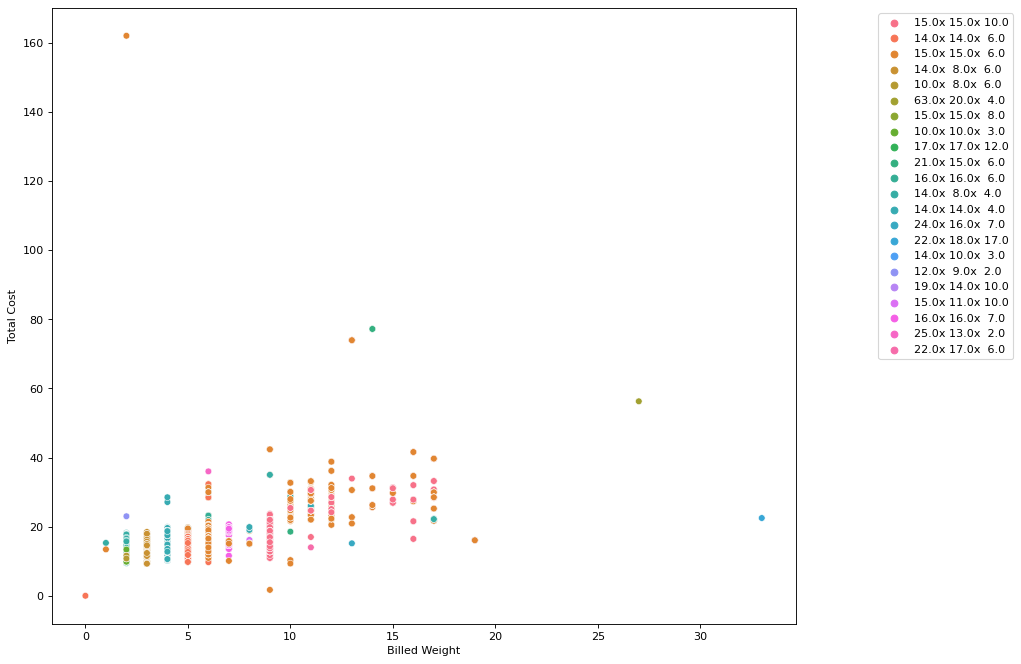

In [16]:
# Full Year Scatter Plot

figure(figsize=(12, 10), dpi=80);

sns.scatterplot(x='Billed Weight',
               y = 'Total Cost',
               hue = 'Detail Keyed Dim',
               data = df_clean);

plt.legend(loc='best', bbox_to_anchor=(.7, 0., .6, 1));

In [17]:
# create copy, drop dups, and sort 
df = df_clean.copy()
df.drop_duplicates(subset=['Tracking Number'], keep='first', inplace=True)
df = df.sort_values(by=['Transaction Date'], ascending=False)

In [18]:
# output to CSV
df.to_csv("ups_output.csv", header=True, index=False)

## Analysis

In [19]:
# Adjustment Rate By Month
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
error_rate = []
df = df_clean.copy()

for month in months:
    df = df_clean.copy()
    df = df[df['Transaction Date'].dt.strftime('%m') == month]
    df_error = df[df['Adjustment'] != 0]
    df_expected = df[df['Adjustment'] == 0]
    error_rate1 = (df_error.shape[0] / (df_expected.shape[0]+.01))*100
    error_rate.append(error_rate1)

zipped = list(zip(months, error_rate))
df_error_rate = pd.DataFrame(zipped, columns = ['Month', 'Error Rate'])
df_error_rate

,Month,Error Rate
0,01,9.473074
1,02,2.624658
2,03,1.968241
3,04,2.839963
4,05,2.908110
5,06,3.197815
6,07,1.938766
7,08,1.770687
8,09,1.257063
9,10,0.000000


## Filters (Date, Outliers, Error Shipments)

In [20]:
# Filter by Date 
df = df_clean.copy()

# Year
df = df[df['Transaction Date'].dt.strftime('%Y') == '2022']

# Month
# df = df[df['Transaction Date'].dt.strftime('%m') >= '07']

# outliers 
df = df[df['Total Cost'] <= 80]

# adjustments

df = df[df['Adjustment'] <= 0]

### Normal Shipments

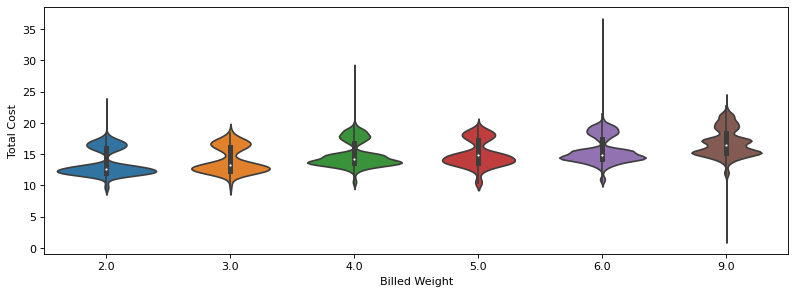

In [21]:
# Normal UPS Shipments
normal_billing_weight = [2.0, 3.0, 4.0, 5.0, 6.0, 9.0]

df_common = df[df['Billed Weight'].isin(normal_billing_weight)]
figure(figsize=(12, 4), dpi=80);
ax = sns.violinplot(x="Billed Weight", y="Total Cost", data = df_common)

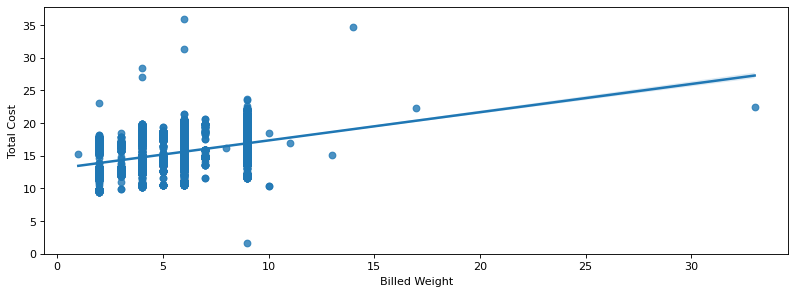

In [22]:
# Reg Plot with Date Filtered Data
figure(figsize=(12, 4), dpi=80);
ax = sns.regplot(x="Billed Weight", y="Total Cost", data=df)

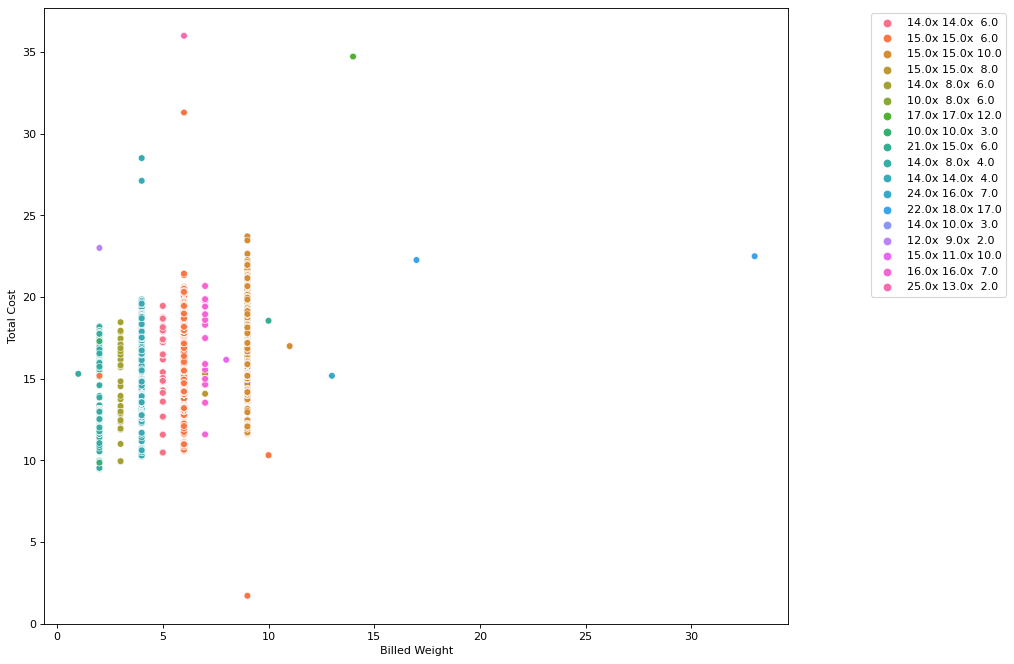

In [23]:
# Additional Filter
#df = df[df['Total Cost'] <= 40]

# Scatter Plot
figure(figsize=(12, 10), dpi=80);

sns.scatterplot(x='Billed Weight',
               y = 'Total Cost',
               hue = 'Detail Keyed Dim',
               data = df);

plt.legend(loc='best', bbox_to_anchor=(.7, 0., .6, 1));

### Normal Box Size Shipments Averages (Filters Defined Above)

In [24]:
# Average Costs of Normal Shipments 
df_common.groupby(by=['Billed Weight']).mean()

,Published Charge,Incentive Charge,Net Charge,Package Quantity,Zone,Total Cost,Adjustment
Billed Weight,,,,,,,
2.0,16.682604,-3.083404,13.599200,1.0,5.687462,13.599200,0.0
3.0,17.212564,-3.144359,14.068205,1.0,5.502564,14.068205,0.0
4.0,18.391226,-3.449442,14.941785,1.0,5.703115,14.941785,0.0
5.0,18.482170,-3.459872,15.022298,1.0,5.551064,15.022298,0.0
6.0,19.275344,-3.612077,15.663267,1.0,5.664980,15.663267,0.0
9.0,20.745584,-3.920318,16.825266,1.0,5.652062,16.825266,0.0


### Error Shipments (Filters Defined Above)

In [25]:
df_error = df[~df['Billed Weight'].isin(normal_billing_weight)]
df_error = df_error.drop_duplicates(subset=['Tracking Number'])
df_error.groupby(by=['Billed Weight']).mean()

,Published Charge,Incentive Charge,Net Charge,Package Quantity,Zone,Total Cost,Adjustment
Billed Weight,,,,,,,
1.0,19.260000,-3.960000,15.300000,1.0,6.000000,15.300000,0.0
7.0,19.893972,-3.756312,16.137660,1.0,5.794326,16.137660,0.0
8.0,24.860000,-8.700000,16.160000,1.0,6.000000,16.160000,0.0
10.0,15.170000,-2.106667,13.063333,1.0,6.000000,13.063333,0.0
11.0,28.110000,-11.110000,17.000000,1.0,7.000000,17.000000,0.0
13.0,23.710000,-8.530000,15.180000,1.0,4.000000,15.180000,0.0
14.0,36.560000,-1.830000,34.730000,1.0,7.000000,34.730000,0.0
17.0,33.030000,-10.760000,22.270000,1.0,5.000000,22.270000,0.0
33.0,40.760000,-18.260000,22.500000,1.0,5.000000,22.500000,0.0


### Adjustments (Filters Defined Above) -- All Box Sizes

In [26]:
df_adj = df[df['Adjustment'] != 0]
df_adj = df_adj.drop_duplicates(subset=['Tracking Number'])
df_adj.sort_values(by=['Transaction Date'], ascending=False)

,Tracking Number,Transaction Date,Service Code,Published Charge,Incentive Charge,Net Charge,Ref No 1,Billed Weight,Package Quantity,Zone,Receiver City,Receiver State,Receiver Postal,Detail Keyed Dim,Total Cost,Adjustment


In [27]:
# remove spaces
df.columns = df.columns.str.replace(' ', '_')

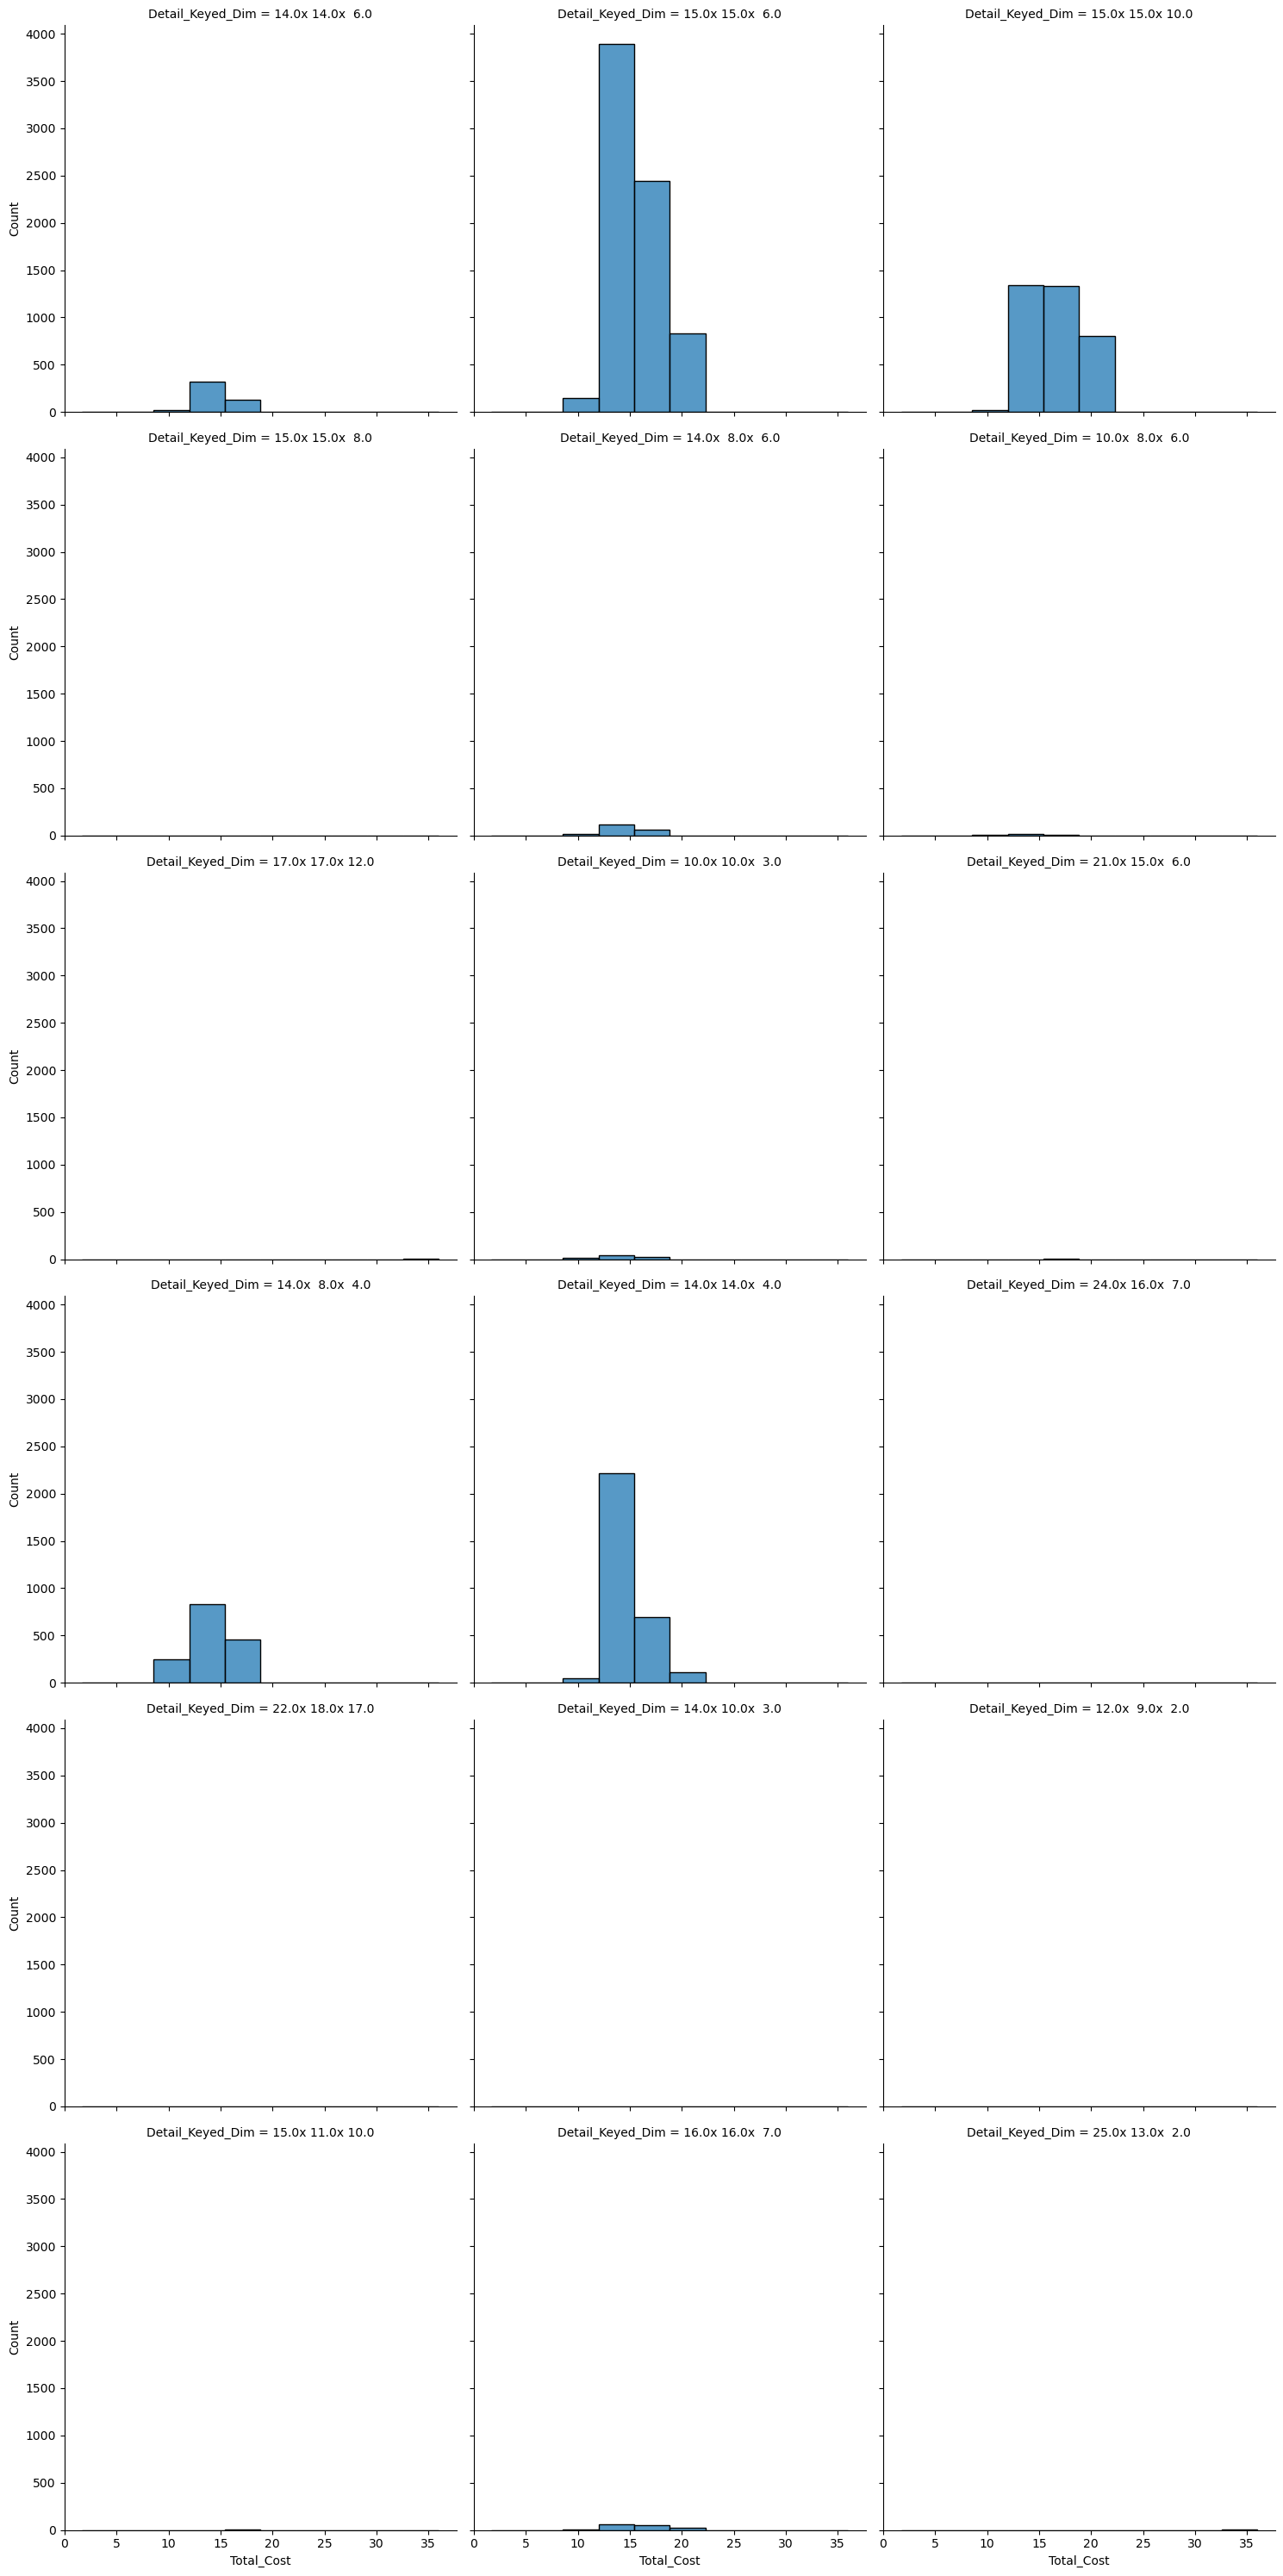

In [28]:
import seaborn as sns

sns.displot(data=df,
           col='Detail_Keyed_Dim',
           x = 'Total_Cost',
           col_wrap = 3,
           bins=10);

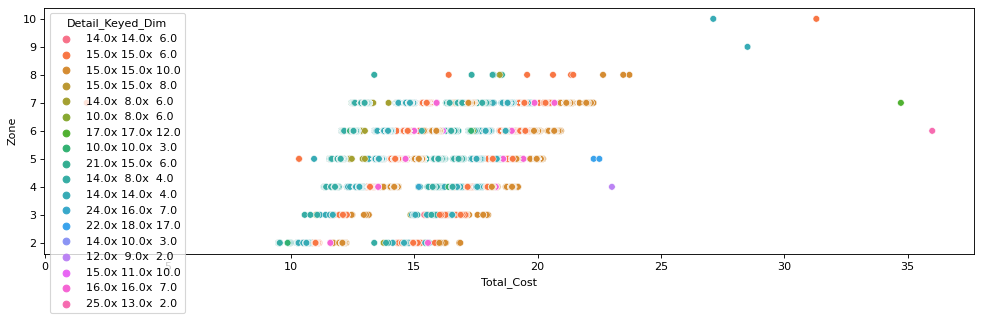

In [29]:
# plot zone
figure(figsize=(15, 4), dpi=80);
sns.scatterplot(data=df,
           hue='Detail_Keyed_Dim',
           x = 'Total_Cost',
           y = 'Zone'
               );

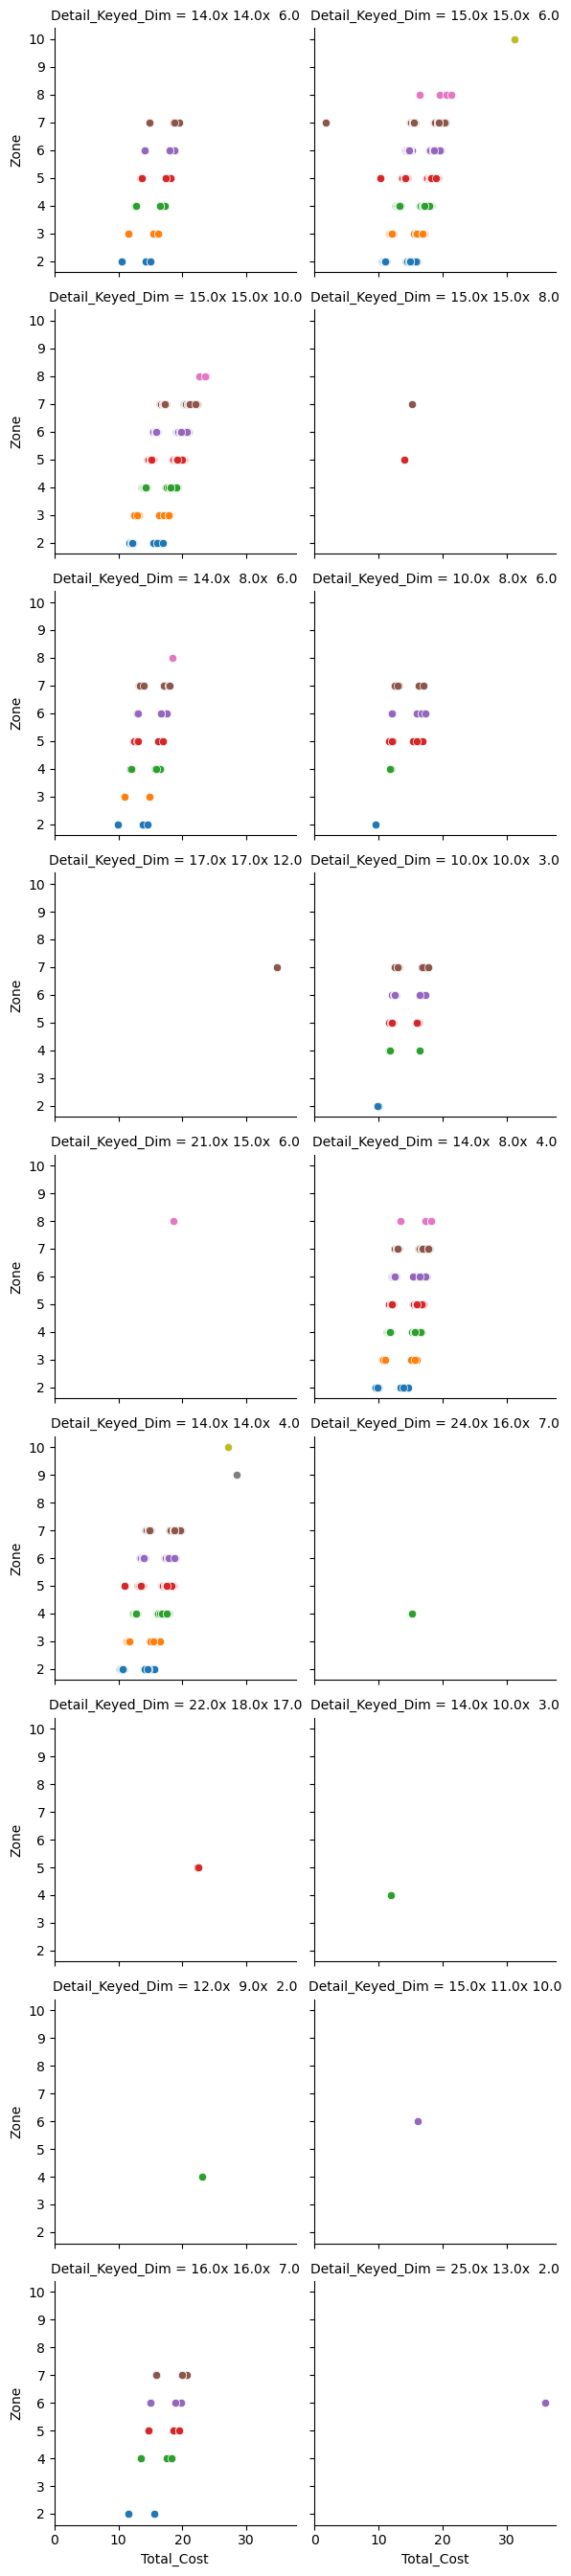

In [30]:
# 
grid = sns.FacetGrid(data=df,
                    col='Detail_Keyed_Dim',
                    hue='Zone',
                    col_wrap=2);

grid.map(sns.scatterplot,"Total_Cost", "Zone");

In [31]:
from statsmodels.formula.api import ols

mdl = ols('Total_Cost ~ Service_Code + Billed_Weight + Zone', data=df).fit()

mdl.params

Intercept                                          6.672052
Service_Code[T.Ground Residential]                 2.223392
Service_Code[T.Ground Residential Collect]         5.002288
Service_Code[T.Ground Return to Sender]           22.652305
Service_Code[T.UPS SurePost - 1 LB or Greater]     2.494809
Billed_Weight                                      0.435029
Zone                                               0.677578
dtype: float64

In [32]:
print("R squared:", mdl.rsquared)
print("rse:" , np.sqrt(mdl.mse_resid))

R squared: 0.2798848930922829
rse: 1.9487609981955565


In [33]:
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Total_Cost   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     1059.
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:42:05   Log-Likelihood:                -34113.
No. Observations:               16354   AIC:                         6.824e+04
Df Residuals:                   16347   BIC:                         6.829e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          6.6721      1.950      3.422      0.001       2.850      10.494
Service_Code[T.Ground Residential]                 2.2234      2.106      1.056      0.291      -1.905       6.352
Service_Code[T.Ground Residential Collect]         5.0023      2.251      2.223      0.026       0.591       9.414
Service_Code[T.Ground Return to Sender]           22.6523      2.756      8.219      0.000      17.250      28.055
Service_Code[T.UPS SurePost - 1 LB or Greater]     2.4948      1.949      1.280      0.201      -1.326       6.315
Billed_Weight                                      0.4350      0.007     60.203      0.000       0.421       0.449
Zone                                               0.6776      0.013     51.482      0.000       0.652       0.703
==============================================================================
Omnibus:                     1760.700   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2380.920
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       2.825   Cond. No.                     2.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# age_yr = df.Age.unique()
# admin = df.Initial_admin.unique()
# comp = df.Complication_risk.unique()
# step = (df.Initial_days.max() - df.Initial_days.min()) / 20
# days = np.arange(df.Initial_days.min(), df.Initial_days.max()+ step, step)

# p = product(age_yr, admin, comp, days)

# explanatory_data = pd.DataFrame(p, columns = ['Age', 'Initial_admin', 'Complication_risk', 'Initial_days'])
# prediction_data = explanatory_data.assign(real_charge = mdl.predict(explanatory_data))
# prediction_data